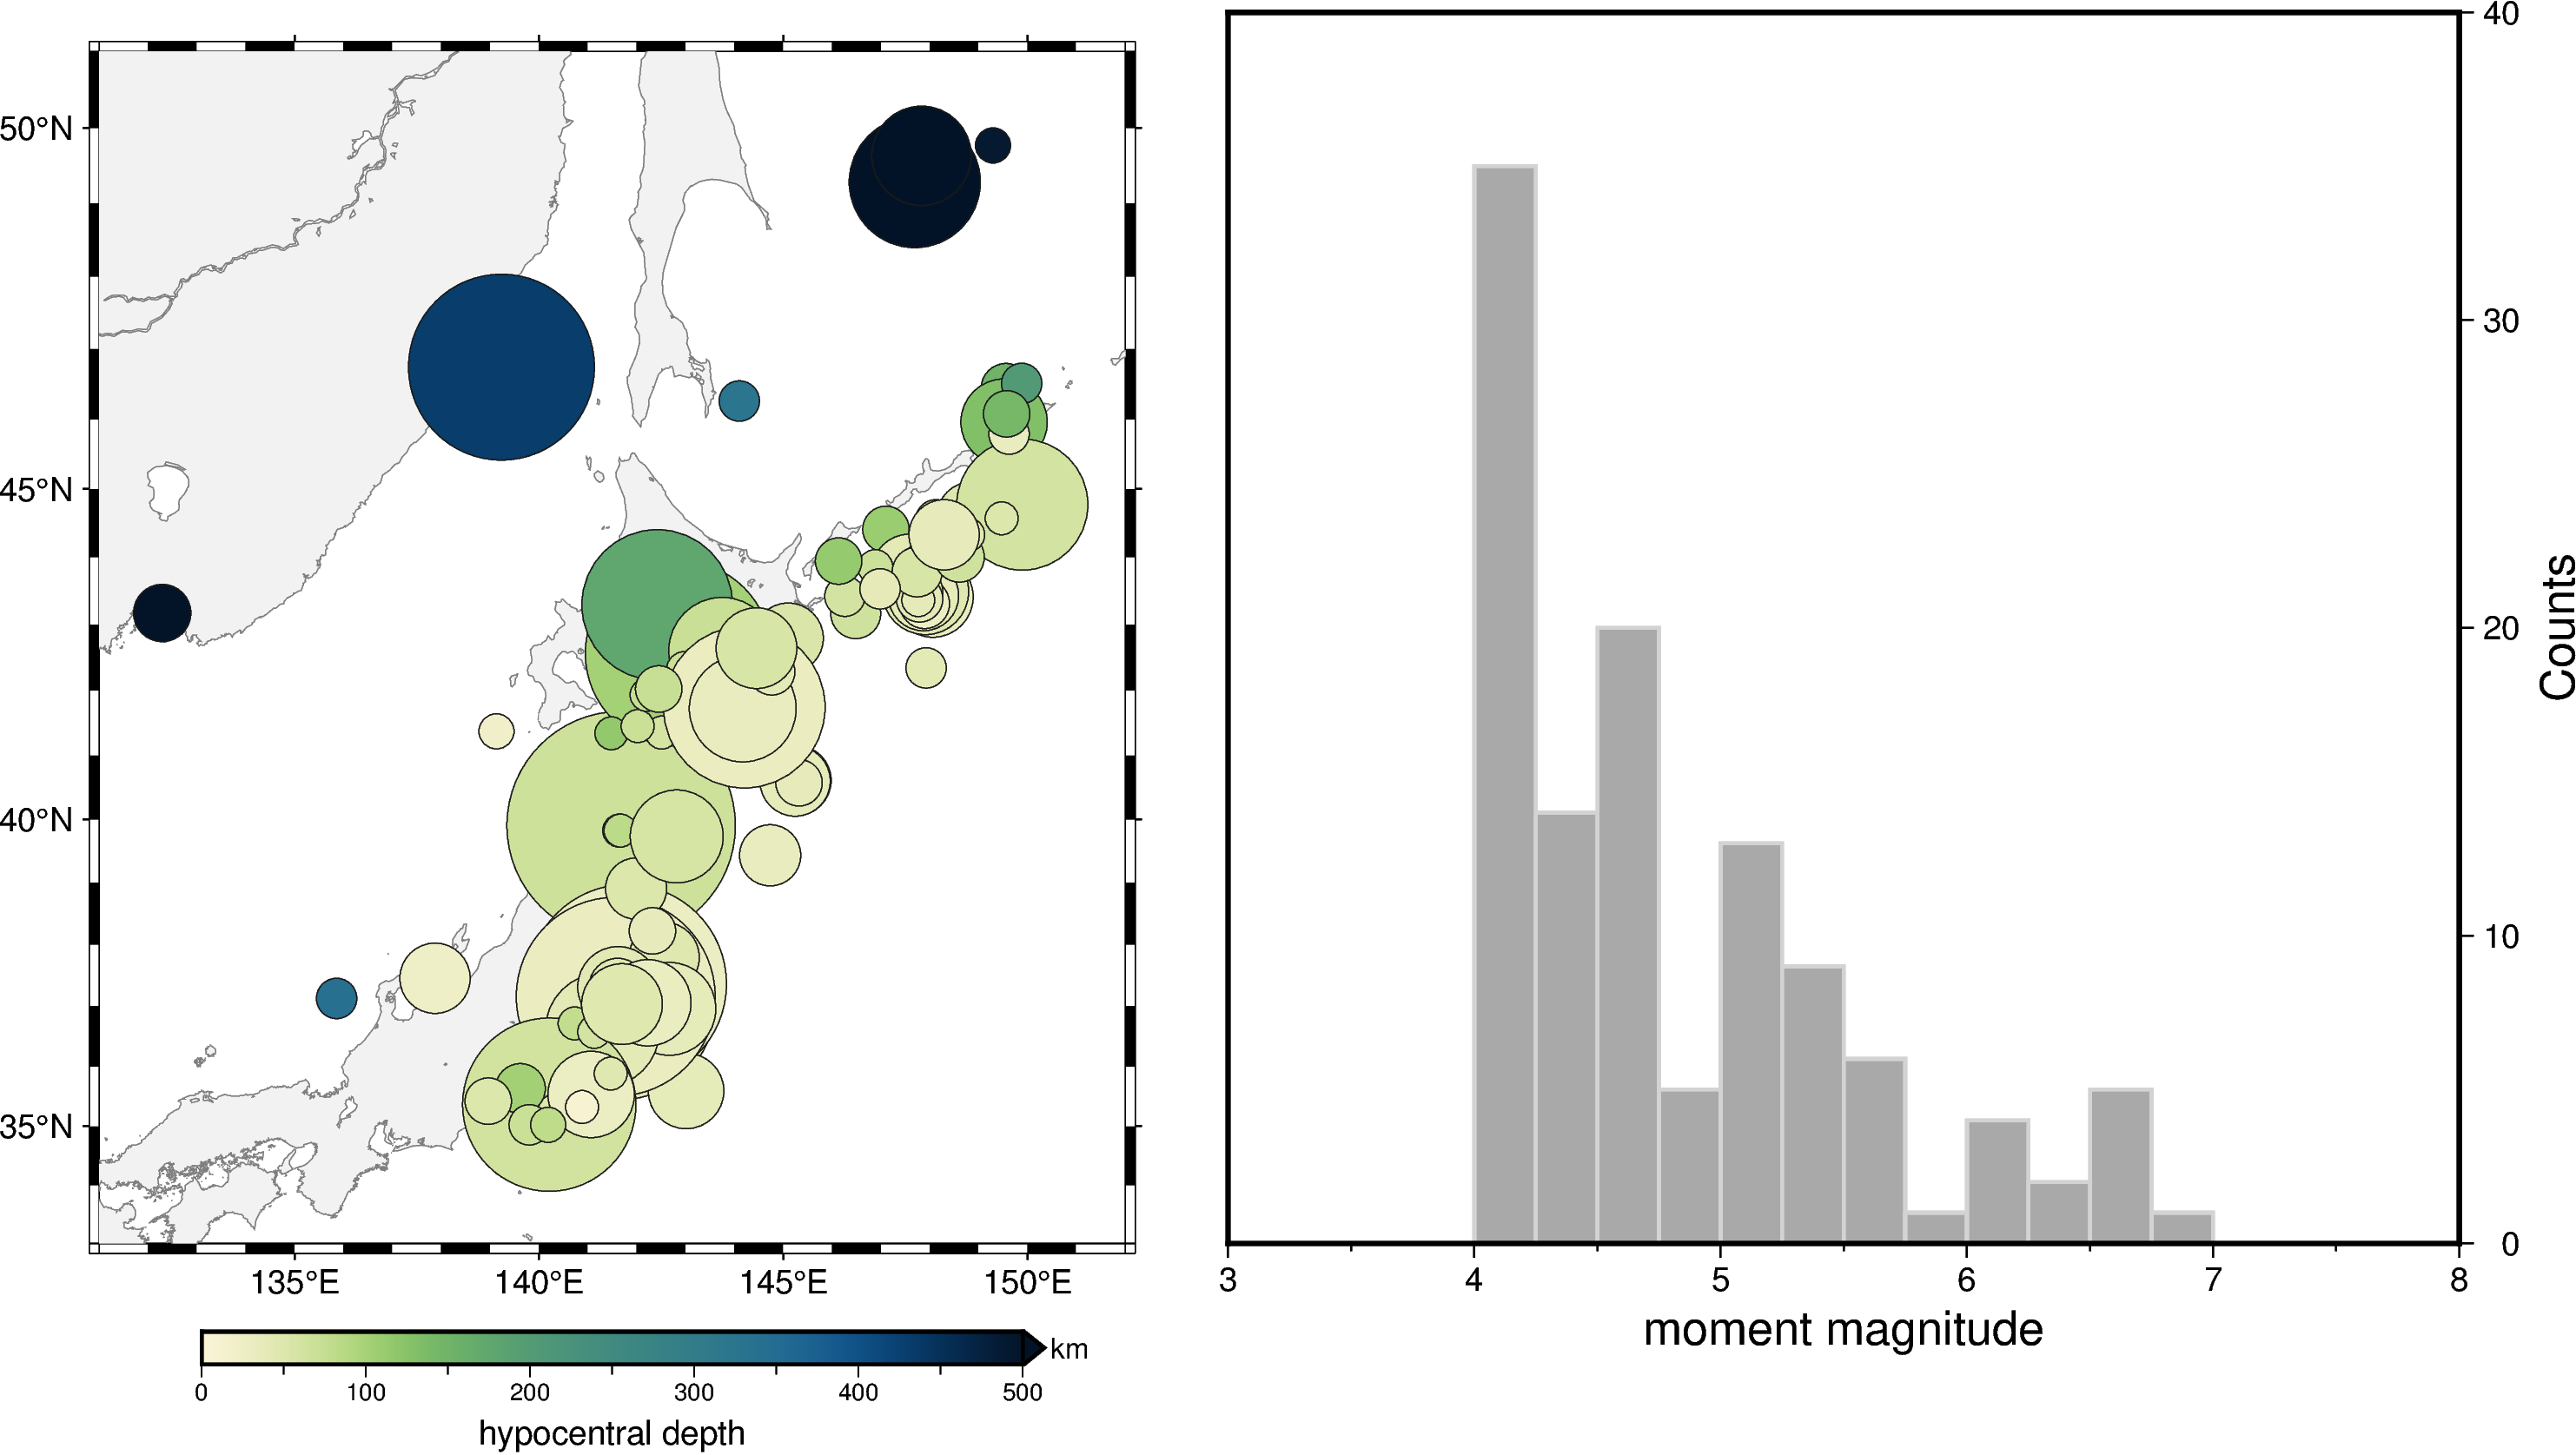

In [1]:
import pandas as pd
import pygmt


fig = pygmt.Figure()

fig.basemap(region=[131, 152, 33, 51], projection="M10c", frame=True)
fig.coast(land="gray95", shorelines="gray50")

pygmt.makecpt(cmap="SCM/navia", series=[0, 500], reverse=True)
fig.colorbar(frame=["xa100f50+lhypocentral depth", "y+lkm"], position="+ef0.2c")

# Load a GMT built-in dataset into a pandas.DataFrame
df_eqs = pygmt.datasets.load_sample_data(name="japan_quakes")
# Plot the epicenters as color- and size-coded circels based on depth or magnitude
fig.plot(
    x=df_eqs.longitude,
    y=df_eqs.latitude,
    size=0.02 * 2**df_eqs.magnitude,
    fill=df_eqs.depth_km,
    cmap=True,
    style="cc",
    pen="gray10",
)

# Shift plot origin to the right
fig.shift_origin(xshift="w+1c")

# Create histogram showing moment magnitude distribution
fig.histogram(
    region=[3, 8, 0, 0],
    projection="X12c",
    frame=["lStE", "xa1af0.5+lmoment magnitude", "yaf+lCounts"],
    data=df_eqs.magnitude,
    series=0.25,
    fill="darkgray",
    pen="1p,lightgray,solid",
    histtype=0,
)

fig.show()